# Henderson-Hasselbalch equation

For a monoprotic acid,
$$ \mathrm{pH} = \mathrm{p}K_\mathrm{a} + \log_{10} \left( \frac{[\mathrm{A}^{-}]}{[\mathrm{HA}]} \right) $$
and in general
$$ k \cdot \mathrm{pH} = \mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},k} + \log_{10} \left( \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{[\mathrm{H}_n\mathrm{A}]} \right) $$

Can rearrange this to express the ratio of a particular acid species relative to their total concentration as a function of pH,
$$ \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{c_a} = \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{\sum_{j=0}^{n}
[\mathrm{H}_{n-j}\mathrm{A}^{j-}]} = \frac{\frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{[\mathrm{H}_n\mathrm{A}]}}{1 +\sum_{j=1}^{n}
\frac{[\mathrm{H}_{n-j}\mathrm{A}^{j-}]}{[\mathrm{H}_n\mathrm{A}]}} = \frac{
 10^{k\cdot\mathrm{pH} - (\mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},k})}
}{
1 + \sum_{j=1}^{n} 10^{j\cdot\mathrm{pH} - (\mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},j})}
}$$
which can be visualised on a speciation diagram.

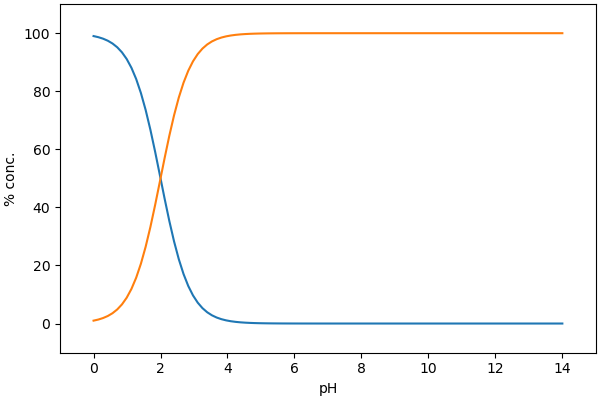

In [1]:
%matplotlib widget
from speciation import main
main()